In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.preprocessing import image 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from tensorflow.image import rgb_to_grayscale

## NN for Normal vs NonNormal

In [ ]:
def normal_nonnormal(x): 
    if x == 'Normal': 
        return x 
    else: 
        return 'Non-Normal'

df = pd.read_csv('../CombinedImages/CombinedUpdated.csv')
na_fill = {'VirusCategory1': 'Normal'}
df = df.fillna(value = na_fill)

df.VirusCategory1 = df.VirusCategory1.map(normal_nonnormal)
df = df.join(pd.get_dummies(df.VirusCategory1.values, prefix = 'type'))
columns_include = ['Normal', 'Non-Normal']
df = df[['ImagePath', 'VirusCategory1'] + [f'type_{i}' for i in columns_include]]


In [ ]:
df

In [ ]:
X = df[['ImagePath', 'VirusCategory1']]
y = df[[f'type_{i}' for i in columns_include]]

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 10, stratify = X.VirusCategory1.values,
                                                   train_size = .9)

x_train = x_train.drop('VirusCategory1', axis = 1)
x_test = x_test.drop('VirusCategory1', axis = 1)

In [ ]:
#print(len(df[df['type_Normal']==1]), len(df[df['type_Normal']==0]))

In [ ]:
def get_image_value(path, img_type): 
    img = image.load_img(path, target_size = (28,28,3))
    img = image.img_to_array(img)
    if img_type == 'grey':
        img = np.dot(img[...,:3], [.2989,.5870,.1140])
    return img/255


def get_data(df, img_type): 
    from tqdm import tqdm
    img_list = [] 
    for path in tqdm(df.ImagePath.values):
        path = f'../CombinedImages/all/{path}'
        img_list.append(get_image_value(path, img_type)) 
    return np.array(img_list).squeeze()
img_type = 'normal'
x_test = get_data(x_test, img_type)
x_train = get_data(x_train, img_type)


In [ ]:
#plt.imshow(x_test[0], cmap = plt.get_cmap('gray'))

In [ ]:
import pickle 
# pickle.dump(x_train, open('picklesNorm/x_train_normal.p', 'wb'), protocol = 2)
# pickle.dump(x_test, open('picklesNorm/x_test_normal.p', 'wb'))

pickle.dump(x_train, open('picklesNorm/x_train_grey.p', 'wb'))
pickle.dump(x_test, open('picklesNorm/x_test_grey.p', 'wb'))

pickle.dump(y_train, open('picklesNorm/y_train.p', 'wb'))
pickle.dump(y_test, open('picklesNorm/y_test.p', 'wb'))

In [ ]:
assert False

In [6]:
def get_image_value(path, img_type): 
    img = image.load_img(path, target_size = (28,28,3))
    img = image.img_to_array(img)
    if img_type == 'grey':
        img = np.dot(img[...,:3], [.2989,.5870,.1140])
    return img/255

img_type = 'normal'


In [138]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import regularizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.preprocessing import image 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from tensorflow.image import rgb_to_grayscale
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.optimizers import Adam
from keras_radam import RAdam
import tensorflow as tf

In [186]:
def get_conv_model_normal(img_type):
    if img_type == 'normal': 
        inp_shape = (28,28,3)
    else: 
        inp_shape = (28,28, 1)
    act = 'sigmoid'
    drop = .25 
    kernal_reg = regularizers.l2(.001)
    dil_rate = 2
    adam = Adam(.001)
    
    model = Sequential() 
    
    model.add(Conv2D(128, kernel_size=(3,3),activation=act, input_shape = inp_shape, 
                     kernel_regularizer = kernal_reg, kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    model.add(Flatten())
    model.add(Dropout(drop))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))

    model.add(Dense(2, activation='sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model 
# def get_conv_model_normal(img_type):
#     if img_type == 'normal': 
#         inp_shape = (28,28,3)
#     else: 
#         inp_shape = (28,28, 1)
#     drop = .25 
#     kernal_reg = regularizers.l2(.001)
#     dil_rate = 2
#     model = Sequential() 
    
#     model.add(Conv2D(128, kernel_size=(3,3),activation='sigmoid', input_shape = inp_shape, 
#                      kernel_regularizer = kernal_reg, kernel_initializer = 'he_uniform', padding = 'same'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))


#     model.add(Conv2D(128, (1, 1), activation='sigmoid', kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
#                      kernel_initializer = 'he_uniform', padding = 'same'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
# #     model.add(Conv2D(128, (1, 1), activation='relu', kernel_regularizer = kernal_reg, dilation_rate = dil_rate))
# #     model.add(MaxPooling2D(pool_size=(2, 2)))
    
#     model.add(Flatten())
#     model.add(Dropout(drop))
    
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(drop))

#     model.add(Dense(2, activation='sigmoid'))
    
#     model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     return model 

In [187]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


def get_samples_norm(img_type): 
    x_train = pickle.load(open(f'picklesNorm/x_train_{img_type}.p', 'rb'))
    x_test = pickle.load(open(f'picklesNorm/x_test_{img_type}.p', 'rb'))
    y_train = pickle.load(open(f'picklesNorm/y_train.p', 'rb'))
    y_test = pickle.load(open(f'picklesNorm/y_test.p', 'rb'))
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = get_samples_norm(img_type)
print(x_train.shape)


if img_type == 'grey': 
    x_train = x_train.reshape(len(x_train), 28, 28, 1)
    x_test = x_test.reshape(len(x_test), 28, 28, 1)

early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=5)
model_checkpoint = ModelCheckpoint('models/NormalModelCheckpointWeights.h5', verbose = 1, save_best_only=True)

epochs = 200
batch_size = 32
normal_model = get_conv_model_normal(img_type)
normal_history = normal_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
         callbacks = [early_stopping, model_checkpoint], validation_data = (x_test, y_test), verbose= 1)

(5829, 28, 28, 3)
Epoch 1/200
182/183 [============================>.] - ETA: 0s - loss: 0.7281 - accuracy: 0.8982
Epoch 00001: val_loss improved from inf to 0.57130, saving model to models/NormalModelCheckpointWeights.h5
183/183 [==============================] - 12s 65ms/step - loss: 0.7277 - accuracy: 0.8983 - val_loss: 0.5713 - val_accuracy: 0.9012
Epoch 2/200
182/183 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0.9444
Epoch 00002: val_loss improved from 0.57130 to 0.20106, saving model to models/NormalModelCheckpointWeights.h5
183/183 [==============================] - 12s 65ms/step - loss: 0.3105 - accuracy: 0.9442 - val_loss: 0.2011 - val_accuracy: 0.9676
Epoch 3/200
182/183 [============================>.] - ETA: 0s - loss: 0.1889 - accuracy: 0.9641
Epoch 00003: val_loss improved from 0.20106 to 0.15988, saving model to models/NormalModelCheckpointWeights.h5
183/183 [==============================] - 12s 65ms/step - loss: 0.1889 - accuracy: 0.9641 - val

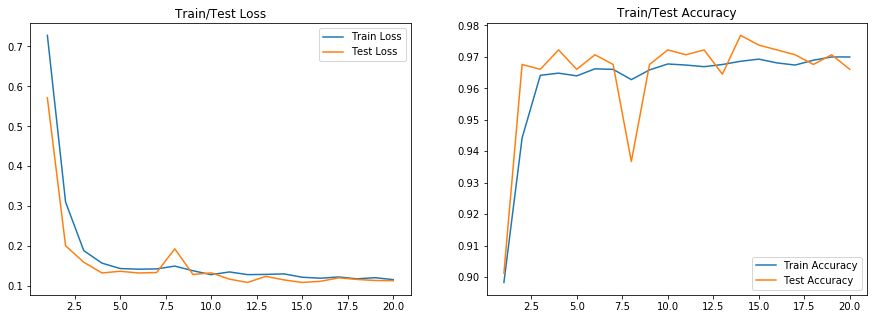

In [188]:
train_loss = normal_history.history['loss']
train_acc = normal_history.history['accuracy']
test_loss = normal_history.history['val_loss']
test_acc = normal_history.history['val_accuracy']
epochs = [i for i in range(1, len(test_acc)+1)]

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(epochs, train_loss, label = 'Train Loss')
ax[0].plot(epochs, test_loss, label = 'Test Loss')
ax[0].set_title('Train/Test Loss')
ax[0].legend()

ax[1].plot(epochs, train_acc, label = 'Train Accuracy')
ax[1].plot(epochs, test_acc, label = 'Test Accuracy')
ax[1].set_title('Train/Test Accuracy')
ax[1].legend()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


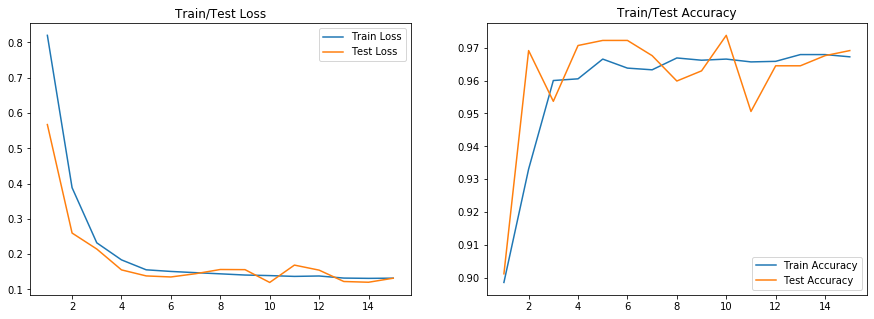

In [52]:
train_loss = normal_history.history['loss']
train_acc = normal_history.history['accuracy']
test_loss = normal_history.history['val_loss']
test_acc = normal_history.history['val_accuracy']
epochs = [i for i in range(1, len(test_acc)+1)]

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(epochs, train_loss, label = 'Train Loss')
ax[0].plot(epochs, test_loss, label = 'Test Loss')
ax[0].set_title('Train/Test Loss')
ax[0].legend()

ax[1].plot(epochs, train_acc, label = 'Train Accuracy')
ax[1].plot(epochs, test_acc, label = 'Test Accuracy')
ax[1].set_title('Train/Test Accuracy')
ax[1].legend()

In [196]:
normal_model = get_conv_model_normal(img_type)
normal_model.load_weights('models/NormalModelCheckpointWeights.h5')
tester_img = get_image_value('TestImages/Normal6.jpg', img_type)
if img_type == 'grey': 
    tester_img = np.reshape(tester_img, (1,28,28,1))
else:
    tester_img = np.reshape(tester_img, (1,28,28,3))
normal_order = ['Normal', 'Non-Normal']
normal_predict = normal_model.predict(tester_img).squeeze()
print(normal_predict,normal_order[np.argmax(normal_predict)])



[0.0097564  0.98980427] Non-Normal


In [ ]:
test_predict = normal_model.predict(x_test.reshape(len(x_test), 28, 28, 3))
print(y_test)
print(confusion_matrix(y_test, test_predict))

In [ ]:
assert False

### Classes of NonNormal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import regularizers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('../CombinedImages/CombinedUpdated.csv')
na_fill = {'VirusCategory1': 'Normal'}
df = df.fillna(value = na_fill)
df = df.replace('E.Coli', 'Bacterial')
df = df.replace('COVID-19, ARDS', 'Viral')
df = df.replace('COVID-19', 'Viral')
df = df.replace('Mycoplasma Bacterial Pneumonia', 'Bacterial')
df = df.replace('Klebsiella', 'Bacterial')
df = df.replace('Legionella', 'Bacterial')
df = df.replace('Chlamydophila', 'Bacterial')
df = df.replace('Pneumocystis', 'Fungal')
df = df.replace('Streptococcus', 'Bacterial')
df = df.replace('Influenza', 'Viral')
df = df.replace('ARDS', 'Viral')
df = df.replace('SARS', 'Viral')
df = df.replace('Influenza', 'Viral')
df = df.replace('Varicella', 'Viral')


df.VirusCategory1.unique()
# df.VirusCategory1 = df.VirusCategory1.str.strip()
pneu_types = ['Viral', 'Bacterial', 'Fungal']
df = df.join(pd.get_dummies(df.VirusCategory1.values, prefix = 'type'))

df = df[['ImagePath', 'VirusCategory1']+[f'type_{i}' for i in pneu_types]]
df = df[df.VirusCategory1.isin(pneu_types)]
df.head(3)

In [ ]:
df.VirusCategory1.value_counts()

In [ ]:
random_state = 10
X = df[['ImagePath', 'VirusCategory1']]
y = df[[f'type_{i}' for i in pneu_types]]
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = .84, stratify = X.VirusCategory1.values)
x_train = x_train.drop('VirusCategory1', axis = 1)
x_test = x_test.drop('VirusCategory1', axis = 1)
x_test.shape


In [ ]:
img_type = 'normal'
x_test = get_data(x_test, img_type)
x_train = get_data(x_train, img_type)

In [ ]:
import pickle 
pickle.dump(x_train, open('picklesNonNorm/x_train_normal.p', 'wb'), protocol = 2)
pickle.dump(x_test, open('picklesNonNorm/x_test_normal.p', 'wb'))

# pickle.dump(x_train, open('picklesNonNorm/x_train_grey.p', 'wb'))
# pickle.dump(x_test, open('picklesNonNorm/x_test_grey.p', 'wb'))

pickle.dump(y_train, open('picklesNonNorm/y_train.p', 'wb'))
pickle.dump(y_test, open('picklesNonNorm/y_test.p', 'wb'))

In [ ]:
def get_samples_nonnorm(img_type): 
    x_train = pickle.load(open(f'picklesNonNorm/x_train_{img_type}.p', 'rb'))
    x_test = pickle.load(open(f'picklesNonNorm/x_test_{img_type}.p', 'rb'))
    y_train = pickle.load(open(f'picklesNonNorm/y_train.p', 'rb'))
    y_test = pickle.load(open(f'picklesNonNorm/y_test.p', 'rb'))
    return x_train, x_test, y_train, y_test


In [ ]:
def get_conv_model_nonnormal(img_type):
    if img_type == 'normal': 
        inp_shape = (28,28,3)
    else: 
        inp_shape = (28,28, 1)
    drop = .25 
    kernal_reg = regularizers.l2(.001)
    dil_rate = 2
    model = Sequential() 
    
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu', input_shape = inp_shape, 
                     kernel_regularizer = kernal_reg))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(128, (1, 1), activation='relu', kernel_regularizer = kernal_reg, dilation_rate = dil_rate))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (1, 1), activation='relu', kernel_regularizer = kernal_reg, dilation_rate = dil_rate))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(drop))
    
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))

    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def get_samples_nonnorm(img_type): 
    x_train = pickle.load(open(f'picklesNonNorm/x_train_{img_type}.p', 'rb'))
    x_test = pickle.load(open(f'picklesNonNorm/x_test_{img_type}.p', 'rb'))
    y_train = pickle.load(open(f'picklesNonNorm/y_train.p', 'rb'))
    y_test = pickle.load(open(f'picklesNonNorm/y_test.p', 'rb'))
    return x_train, x_test, y_train, y_test
img_type = 'normal'

x_train, x_test, y_train, y_test = get_samples_nonnorm(img_type)
x_train.shape

if img_type == 'grey': 
    x_train = x_train.reshape(len(x_train), 28, 28, 1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('models/Non-NormalModelCheckpointWeights.h5', verbose = 1, save_best_only=True)

epochs = 50
batch_size = 1
nonnormal_model = get_conv_model_nonnormal(img_type)
nonnormal_history = nonnormal_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 1, 
         callbacks = [early_stopping, model_checkpoint], validation_data = (x_test, y_test))

In [ ]:
assert False

### Test on Random Images

['Normal', 'COVID-19', 'Bacterial', 'Fungal', 'SARS']
['Normal', 'COVID-19', 'Bacterial']

In [ ]:
tester_img = get_image_value('TestImages/Bacterial.jpg', img_type)
if img_type == 'normal':
    tester_img = np.reshape(tester_img, (1, 28,28,3))
    print(tester_img.shape)
def test_stacked(input_image, img_type): 
    normal_order = ['Normal', 'Non-Normal']
    nonnormal_order = ['Viral', 'Bacterial', 'Fungal']
    normal_model = get_conv_model_normal(img_type)
    normal_model.load_weights('models/NormalModelCheckpointWeights.h5')
    
    normal_predict = normal_model.predict(tester_img).squeeze()
    if normal_order[np.argmax(normal_predict)] == 'Non-Normal': 
        nonnormal_predict = nonnormal_model.predict(input_image)
        return nonnormal_order[np.argmax(nonnormal_predict)]
    else: 
        return 'Normal'
test_stacked(tester_img, img_type)